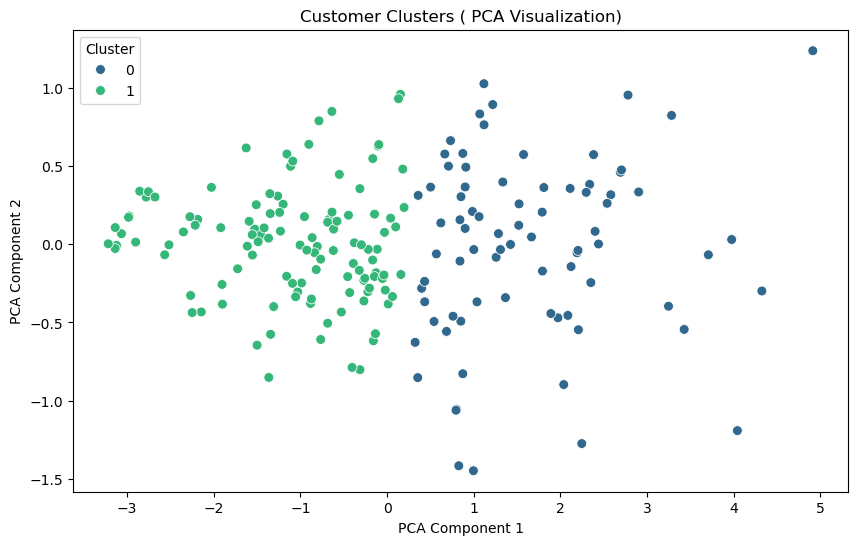


=== Clustering Results Report ===
Number of Clusters Formed: 2
Davies-Bouldin Index (DBI): 0.72
Silhouette Score: 0.49
Cluster Sizes: 
Cluster
1    120
0     79
Name: count, dtype: int64

Cluster Metrics Across All Configurations:
  Clusters: 2, DBI: 0.72, Silhouette: 0.49
  Clusters: 3, DBI: 0.77, Silhouette: 0.41
  Clusters: 4, DBI: 0.87, Silhouette: 0.37
  Clusters: 5, DBI: 0.90, Silhouette: 0.36
  Clusters: 6, DBI: 0.93, Silhouette: 0.35
  Clusters: 7, DBI: 0.93, Silhouette: 0.36
  Clusters: 8, DBI: 0.92, Silhouette: 0.33
  Clusters: 9, DBI: 1.08, Silhouette: 0.30
  Clusters: 10, DBI: 1.03, Silhouette: 0.29

Detailed metrics saved to 'Jeevanand_V_Clustering.csv'


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv(r"C:\DataSciProject\Customers.csv")
transactions = pd.read_csv(r"C:\DataSciProject\Transactions.csv")

# Merge datasets
data = transactions.merge(customers, on="CustomerID")

# Feature engineering
customer_features = data.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum",
    "TransactionID": "count",  # Purchase frequency
}).reset_index()

# Normalize numerical features
scaler = StandardScaler()
numeric_features = customer_features[["TotalValue", "Quantity", "TransactionID"]]
scaled_features = scaler.fit_transform(numeric_features)

# Clustering using K-Means (choose 2 to 10 clusters)

db_indices = []
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_features)

    # Calculate DB Index and Silhouette Score
    db_index = davies_bouldin_score(scaled_features, labels)
    silhouette = silhouette_score(scaled_features, labels)
    db_indices.append(db_index)
    silhouette_scores.append(silhouette)

# Determine optimal number of clusters (minimum DB Index)
optimal_clusters = cluster_range[np.argmin(db_indices)]

# Final K-Means model with optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
final_labels = kmeans.fit_predict(scaled_features)
customer_features["Cluster"] = final_labels

# Visualize clusters (2D using PCA)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=pca_features[:, 0],
    y=pca_features[:, 1],
    hue=final_labels,
    palette="viridis",
    s=50,
)
plt.title("Customer Clusters ( PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Save the clustering results
customer_features.to_csv("Customer_Segmentation.csv", index=False)

# Report DB Index and Silhouette Score for optimal clusters
# print(f"Optimal Number of Clusters: {optimal_clusters}")
# print(f"Davies-Bouldin Index (DBI): {min(db_indices):.2f}")
# print(f"Silhouette Score: {silhouette_scores[np.argmin(db_indices)]:.2f}")

# Enhanced report
print("\n=== Clustering Results Report ===")
print(f"Number of Clusters Formed: {optimal_clusters}")
print(f"Davies-Bouldin Index (DBI): {min(db_indices):.2f}")
print(f"Silhouette Score: {silhouette_scores[np.argmin(db_indices)]:.2f}")
print(f"Cluster Sizes: \n{customer_features['Cluster'].value_counts()}")
print("\nCluster Metrics Across All Configurations:")
for i, n_clusters in enumerate(cluster_range):
    print(f"  Clusters: {n_clusters}, DBI: {db_indices[i]:.2f}, Silhouette: {silhouette_scores[i]:.2f}")

# Save detailed metrics
metrics_df = pd.DataFrame({
    "Number of Clusters": cluster_range,
    "Davies-Bouldin Index": db_indices,
    "Silhouette Score": silhouette_scores,
})
metrics_df.to_csv("Jeevanand_V_Clustering.csv", index=False)
print("\nDetailed metrics saved to 'Jeevanand_V_Clustering.csv'")


